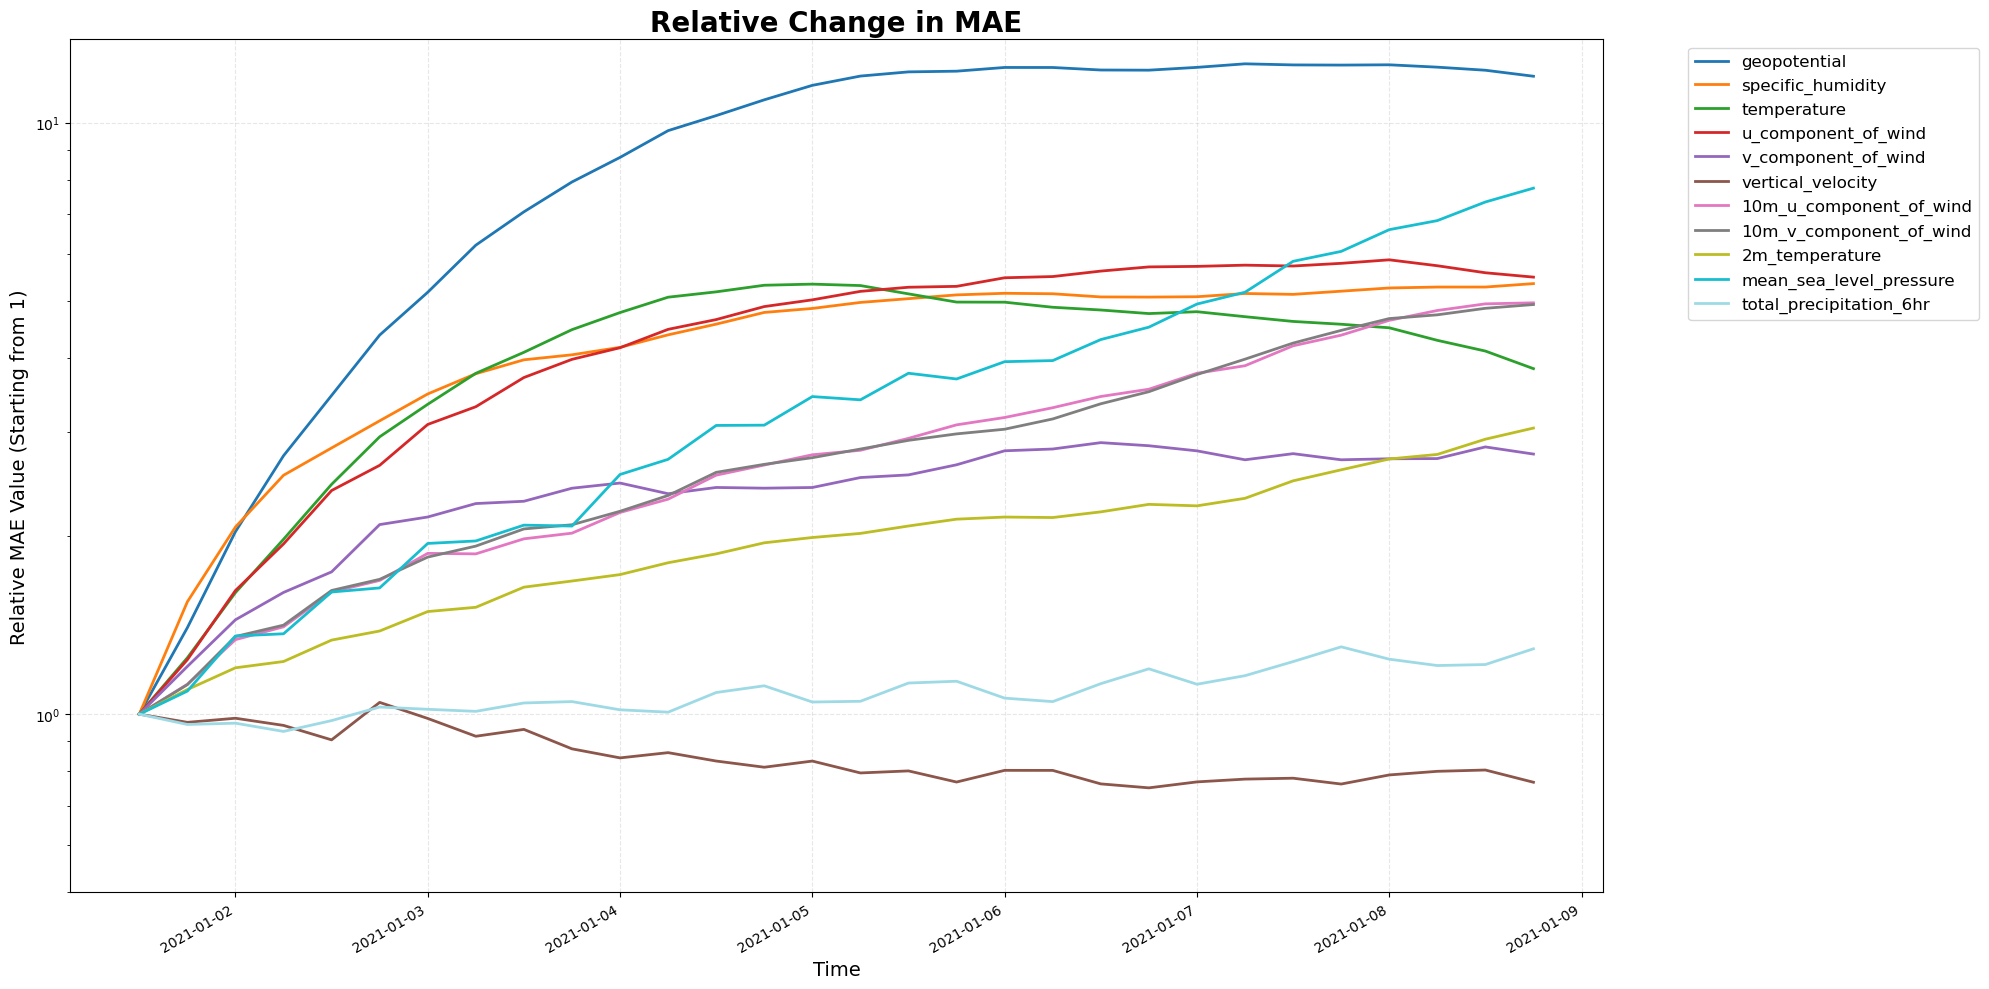

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# CSV 파일 읽기
df = pd.read_csv('mae_results.csv', parse_dates=[0], index_col=0)

# 각 변수를 첫 번째 값으로 나누어 정규화
df_normalized = df.div(df.iloc[0])

# 그래프 스타일 설정
plt.style.use('default')
plt.figure(figsize=(20, 10))

# 색상 설정
colors = plt.cm.tab20(np.linspace(0, 1, len(df.columns)))

# 각 변수에 대해 선 그래프 그리기
for column, color in zip(df_normalized.columns, colors):
    plt.plot(df_normalized.index, df_normalized[column], label=column, linewidth=2, color=color)

# 그래프 제목과 레이블 설정
plt.title('Relative Change in MAE', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Relative MAE Value (Starting from 1)', fontsize=14)

# x축 날짜 형식 설정
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # 날짜 레이블 자동 포맷

# y축 로그 스케일 설정
plt.yscale('log')

# 범례 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.3)

# y축 범위 설정
plt.ylim(0.5, df_normalized.max().max() * 1.1)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()